In [1]:
# @GaneshInnovator
# https://github.com/GaneshInnovator

In [3]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf
import PIL.ImageOps as ImageOps
import PIL.Image as Image
from tqdm import tqdm

In [4]:
class_names = [
               'Aloevera',
                'Amla',
               'Amruta_Balli',
               'Arali',
               'Ashoka', 'Ashwagandha',
               'Avacado',
               'Bamboo',
               'Basale',
               'Betel',
               'Betel_Nut',
               'Brahmi',
               'Castor',
               'Curry_Leaf',
               'Doddapatre',
               'Ekka',
               'Ganike',
               'Gauva',
               'Geranium',
               'Henna',
               'Hibiscus',
               'Honge',
               'Insulin',
               'Jasmine',
               'Lemon',
               'Lemon_grass',
               'Mango',
               'Mint',
               'Nagadali',
               'Neem',
               'Nithyapushpa',
               'Nooni',
               'Pappaya',
               'Pepper',
               'Pomegranate',
               'Raktachandini',
               'Rose',
               'Wood_sorel',
               'Sapota',
               'Tulasi']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [5]:
def pre_process(img_path):
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, IMAGE_SIZE) 
    return image

In [6]:
def load_data():
    datasets = ['C:/Datasets/Indian Medicinal Leaves Image Datasets/input Medicinal plant dataset', 'C:/Datasets/Indian Medicinal Leaves Image Datasets/test']
    output = []

    # Iterate through training and test sets
    for dataset in datasets:

        images = []
        labels = []

        print("Loading {}".format(dataset))

        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]

            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)

                # Open and resize the img
                image = pre_process(img_path)

                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)

        images = np.array(images, dtype='float32')
        labels = np.array(labels, dtype='int32')

        output.append((images, labels))

    return output

In [7]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading C:/Datasets/Indian Medicinal Leaves Image Datasets/input Medicinal plant dataset


100%|███████████████████████████████████████████████████████████████████████████████| 146/146 [00:01<00:00, 101.48it/s]


Loading C:/Datasets/Indian Medicinal Leaves Image Datasets/test


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 63.96it/s]


In [8]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [9]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 5781
Number of testing examples: 2
Each image is of size: (150, 150)


In [10]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [11]:
def display_examples(class_names, images, labels):
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

In [12]:
# A function to simply display only one random image
def display_random_image(class_names, images, labels):
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

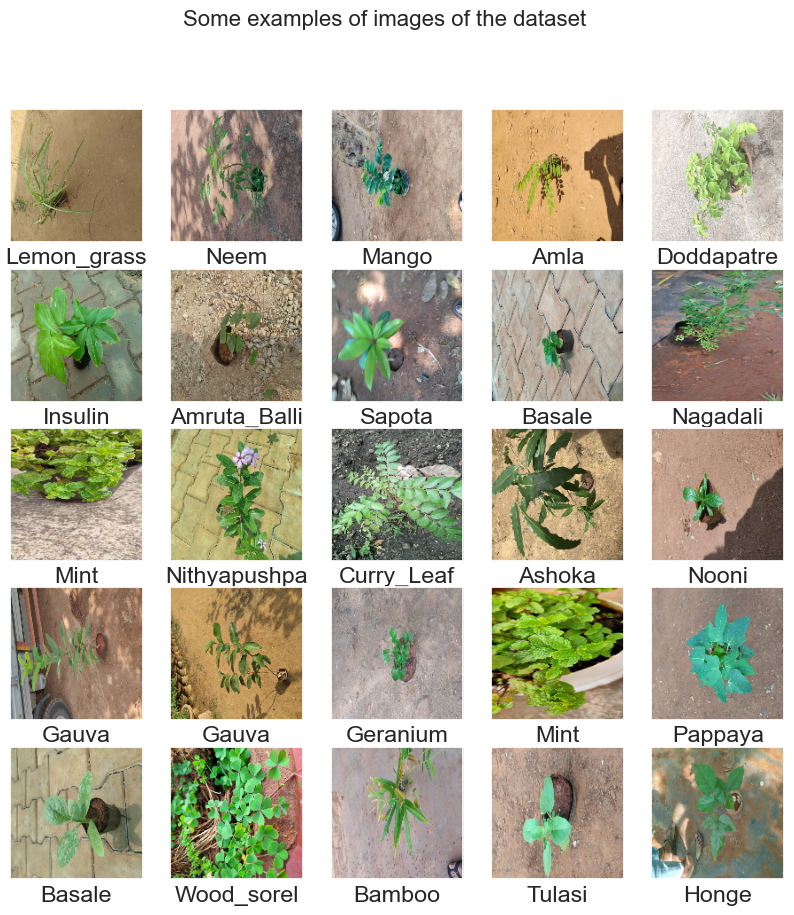

In [13]:
display_examples(class_names, train_images, train_labels)

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(30, activation=tf.nn.softmax)
])

In [16]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
# Check for out-of-range labels
invalid_labels = [label for label in train_labels if label < 0 or label >= 30]

if invalid_labels:
    print("Invalid labels detected:", invalid_labels)
    # Handle out-of-range labels (e.g., remove corresponding samples)
    invalid_indices = np.where((train_labels < 0) | (train_labels >= 30))[0]
    train_images = np.delete(train_images, invalid_indices, axis=0)
    train_labels = np.delete(train_labels, invalid_indices)

Invalid labels detected: [38, 30, 31, 32, 37, 39, 31, 33, 30, 35, 32, 34, 39, 35, 31, 33, 36, 30, 31, 37, 31, 32, 38, 32, 38, 32, 32, 36, 39, 33, 39, 32, 36, 34, 35, 33, 32, 32, 34, 33, 33, 37, 31, 36, 33, 33, 35, 35, 39, 36, 32, 33, 30, 30, 31, 33, 32, 37, 36, 33, 33, 30, 36, 38, 38, 34, 33, 38, 31, 35, 31, 32, 34, 37, 30, 37, 39, 36, 34, 35, 38, 39, 39, 35, 34, 32, 30, 32, 34, 36, 34, 36, 31, 38, 30, 30, 31, 31, 34, 30, 34, 35, 38, 32, 39, 39, 38, 35, 34, 33, 38, 33, 39, 39, 35, 37, 36, 31, 30, 36, 37, 37, 39, 34, 39, 33, 35, 30, 38, 30, 32, 34, 34, 39, 35, 30, 31, 37, 37, 39, 38, 37, 30, 31, 36, 35, 33, 36, 32, 34, 30, 30, 39, 31, 32, 36, 30, 36, 37, 37, 31, 30, 37, 38, 33, 34, 36, 32, 30, 33, 33, 38, 33, 36, 32, 38, 31, 33, 34, 36, 31, 33, 35, 37, 38, 31, 32, 36, 34, 30, 30, 36, 37, 30, 32, 30, 37, 35, 33, 35, 33, 39, 36, 38, 30, 38, 38, 36, 33, 37, 39, 39, 38, 33, 31, 39, 30, 34, 35, 35, 33, 39, 31, 38, 34, 38, 38, 31, 31, 39, 39, 36, 30, 36, 32, 36, 39, 34, 30, 39, 31, 34, 32, 35

In [17]:
# Filter out invalid labels and corresponding images
valid_indices = np.where((train_labels >= 0) & (train_labels < 30))[0]
train_images = train_images[valid_indices]
train_labels = train_labels[valid_indices]

In [18]:
# Split data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [19]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=20, validation_data=(val_images, val_labels))

Epoch 1/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.0406 - loss: 6.3852 - val_accuracy: 0.0640 - val_loss: 3.3662
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.0714 - loss: 3.3113 - val_accuracy: 0.1465 - val_loss: 3.0761
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.1576 - loss: 2.9768 - val_accuracy: 0.2430 - val_loss: 2.6635
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.3148 - loss: 2.4657 - val_accuracy: 0.4012 - val_loss: 2.1641
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.4794 - loss: 1.8652 - val_accuracy: 0.4651 - val_loss: 1.8849
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.5803 - loss: 1.4559 - val_accuracy: 0.5151 - val_loss: 1.6630
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.6786 - loss: 1.1577 - val_accuracy: 0.5477 - val_loss: 1.5627
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.7276 - loss: 0.9241 - val_accuracy: 0.5884 - val_loss:

In [20]:
def plot_accuracy_loss(history):
    """
        We plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "accuracy")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_accuracy")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

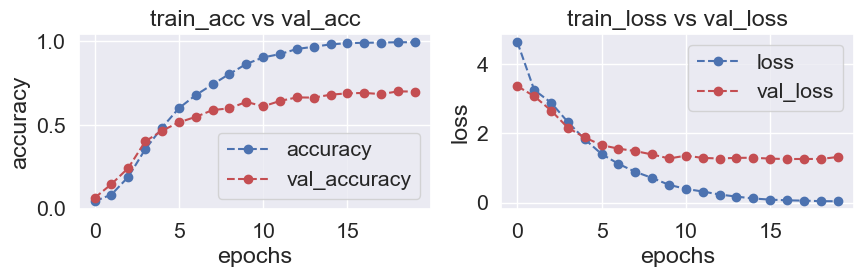

In [21]:
plot_accuracy_loss(history)

In [22]:
test_loss = model.evaluate(test_images, test_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 1.0000 - loss: 0.0169


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


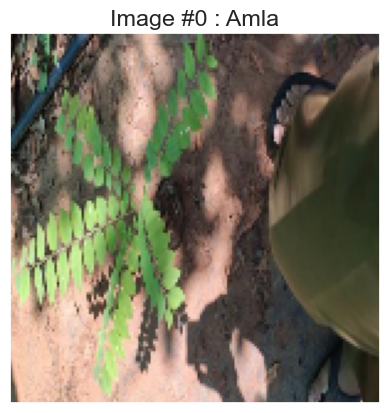

In [23]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

display_random_image(class_names, test_images, pred_labels)

In [31]:
data = np.ndarray(shape=(1, 150, 150, 3), dtype=np.float32)
image = Image.open('C:/Datasets/Indian Medicinal Leaves Image Datasets/test/Amla/27.jpg')
#image sizing
size = (150, 150)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

#turn the image into a numpy array
image_array = np.asarray(image)
# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1

# Load the image into the array
data[0] = normalized_image_array

# run the inference
prediction = model.predict(data)
    

pred_label = np.argmax(prediction, axis = 1) # We take the highest probability
class_prediction = class_names[pred_label[0]]
print(class_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Mint


In [33]:
if class_prediction == 'Aloevera':
    print('Aloe vera is a medicinal plant with antioxidant and antibacterial properties. Aloe vera benefits can include reducing dental plaque, accelerating wound healing, preventing wrinkles, and managing blood sugar.')

if class_prediction == 'Amla':
    print('The antioxidants and vitamins found in amla berries offer several health benefits. High concentrations of vitamin C in amla helps the body recover from illness. Amla berries also include several flavonols, chemicals that have been linked to benefits like improved memory. ')

if class_prediction == 'Gauva':
    print('Guava fruit and leaves contain nutrients, including vitamin C and potassium, that may help support your heart, digestion, and other body systems.')

if class_prediction == 'Mint':
    print('Rich in Nutrients,May Improve Irritable Bowel Syndrome,May Help Relieve Indigestion,Could Improve Brain Function, May Decrease Breastfeeding Pain.')

Rich in Nutrients,May Improve Irritable Bowel Syndrome,May Help Relieve Indigestion,Could Improve Brain Function, May Decrease Breastfeeding Pain.


In [34]:
model.save('model_sev.h5')